In [2]:
from IPython.display import Image

# 추가 정리 부탁드리는것!
- mmm 사례?
- 코드에 대한 자세한 설명!

# Marketing Mix Model with Python

# 이번주에 우리가 배울것!?
- Marketing Mix Model(MMM)
- Concepts and Techniques when Explore Data
- Learn Ordinary Least Squares (OLS)

## MMM 이란?
- Technique used to determine Market Attribution
---
- statistical technique (usually regression) 
  marketing and sales data to estimate the impact of
  various marketing channels 
---
-  Unlike Attribution Modeling
    - MMM attempt to measure the impact of immeasurable marketing channels: TV, radios, newspapers

### The benefits of marketing mix modeling
- marketing mix modeling focuses on analyzing the inputs (think budgets and channels) in relation to the outputs
---
- goal is not to build a comprehensive model of the customer journey, but rather to understand the role each channel and campaign plays in the overall success of the business
---
-  MMM is applied linear regression, which can be far easier to measure reliably because all the inputs are known.

### The drawbacks of marketing mix modeling


- For marketing mix modeling to work, you need a relatively large budget
---
- MMMs typically ignore the counterfactual
    - most marketing mix models focus on the global population
    -  makes it difficult to understand the true impact of the changes you’re making to your budget allocation and channel mix

### 번외 
# Attrribution model?
    - setting rules that determine how much each touchpoint along the customer journey contributes to a sale
---
- Done to estimate the revenue contribution of marketing

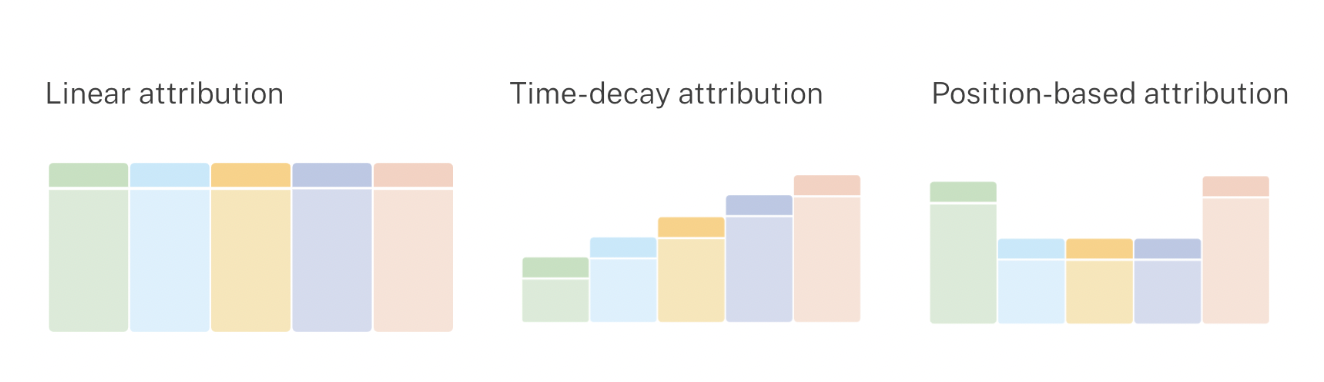

In [3]:
Image('./image/Atrributino.png')

### Linear Atttribution 
- each(trackable) touchpoint along the customer journey has equal revenue contribution
---
### Time-decay attribution 
- more recent touchpoints along the cutomer journey contribute to revenue more
---
### Position-base attribution
- the first and last touchpoints contribute to revenue more than the touchpoints in middle of the customer journey

#  benefits of attribution modeling


- marketers dissect the customer journey and understand 
  how each touchpoint contributes to a sale
---
- theoretically, attribution models should help marketers allocate their budgets more effectively to the channels, campaigns, and activitie

# The drawbacks of attribution modeling


- 1. The false promise of 100% trackability
- 2. Attribution measures clicks — and clicks alone
- 3. Attribution is, in fact, completely made up
- 4. Good vibes only

---

### 코드로 알아 보자 MMM

[https://www.kaggle.com/datasets/sazid28/advertising.csv](https://www.kaggle.com/datasets/sazid28/advertising.csv)

In [3]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Advertising.csv')

In [9]:
# Understand my Variables
# 각 컬럼들의 min / max 값 확인
# 음이 있으면 안되는 데이터에 음수가 있을수도 있음 (환불 관련..)
# mean 값과 std 값을 보고 이상치가 있을지에 대한 유추 해보기 

df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
# index and Unnamed:0 --> !!! 저장할때!! index=False 꼭 하자
df = df.copy().drop(['Unnamed: 0'],axis=1)

<AxesSubplot:>

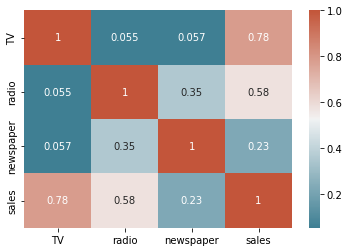

In [12]:
# EDA
# 상관 계수를 봄으로서 세일과 가장 상관 계수가 높은 친구를 알아봄
# 상관과 인과는 다르다는 점은 항상 인지!

# https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
# strong correlation between Tv and sales (0.78)
# 피어슨 상관 계수

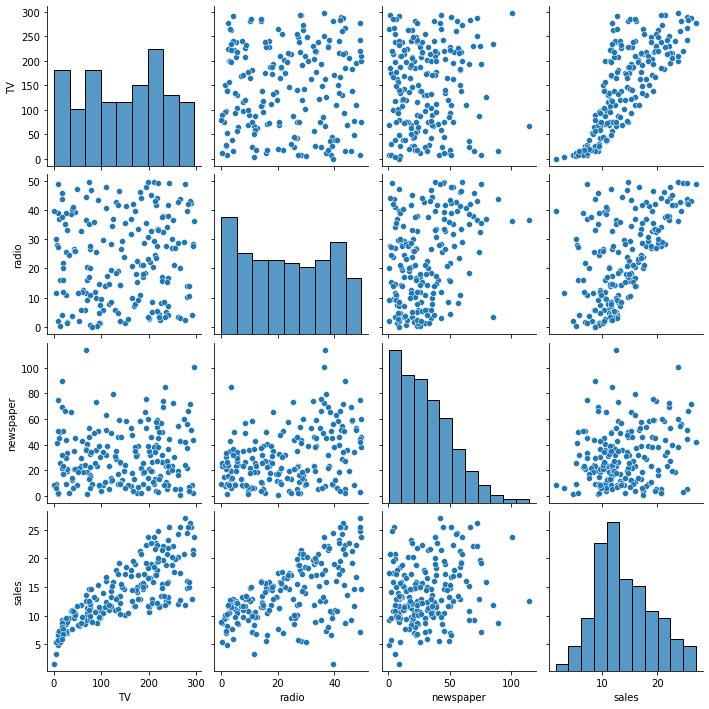

In [14]:
# 데이터 분포를 확인할때 좋은 pairplot
# 단 컬럼이 많으면 정말 돌아가는 시간이 많이 걸림
# 자기 자채의 분포도 확인 할 수 있고 다른 변수간의 분포도 확인 가능하다.

sns.pairplot(df)
# strong relationship between TV and sales, less for radio, and even less for newspapers.

<AxesSubplot:>

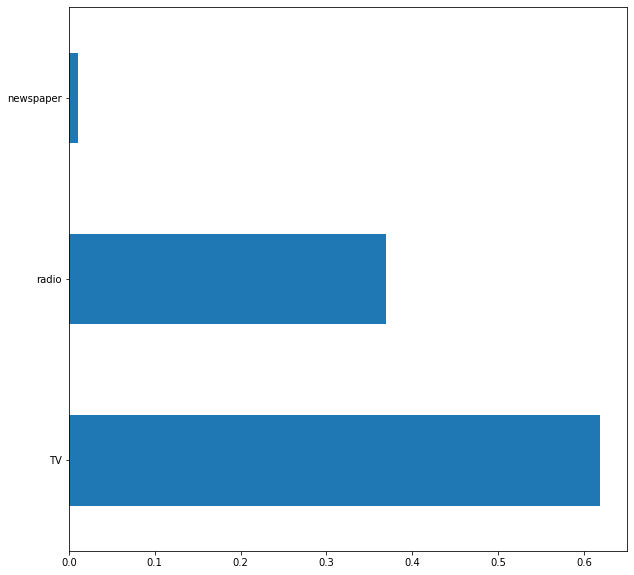

In [17]:
# Feature Importance
## determine how "important each input variable is to predict the out variable"

# random Foreset model
# Setting X and y variables
X = df.loc[:, df.columns != 'sales']
y = df['sales']
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',figsize=(10,10))
# TV is the most important

In [20]:
# OLS Model
# method used to estimate the parameters in a linear regression model

import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model.summary())

### The Adj. R-squared is 0.896, which means that almost 90 of all
### variations in our data can be explained by our model,

### The p-values for TV and radio are less than 0.000, 
### but the p-value for newspaper is 0.86, which indicates 
### that newspaper spend has no significant impact on sales.


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        21:19:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

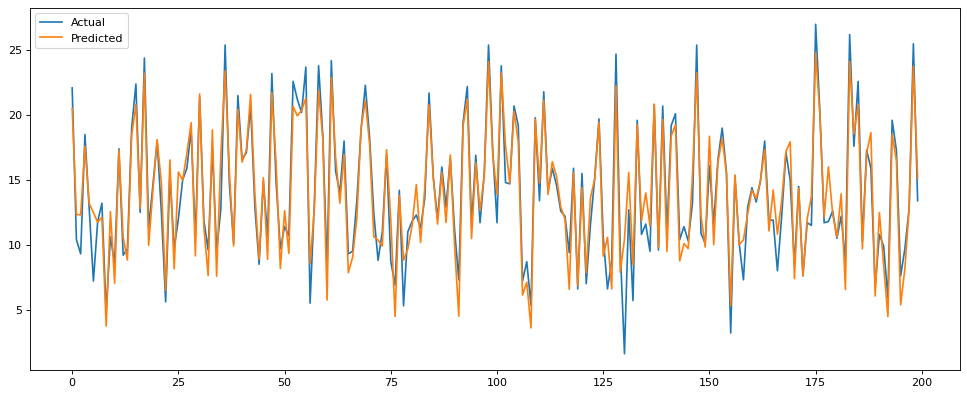

In [21]:
# Defining Actual and Predicted values
y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()


# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()


## 추가 하면 좋을것들 
#Seasonality: It’s almost always the case that company sales are seasonal. For example, a snowboard company’s sales would be much higher during the winter than in the summer. In practice, you’ll want to include a variable to account for seasonality.

#Carryover Effects: The impact of marketing is not usually immediate. In many cases, consumers need time to think about their purchasing decisions after seeing advertisements. Carryover effects account for the time lag between when consumers are exposed to an ad and their response to the ad.

#Base sales vs incremental sales: Not every sale is attributed to marketing. If a company spent absolutely nothing on marketing and still made sales, this would be called its base sales. Thus, to take it a step further, you could try to model advertising spend on incremental sales as opposed to total sales.

# Part 2에서 다룰 것들 
- 피어슨 상관 계수
- Random Forest 원리
- OLS 보는법
- 시계열 데이터 다루는 법 
    - seasonality
    - carryover Effects 
    - Base sales vs incremental sales